In [2]:
from IPython.display import HTML, display

In [3]:
display(HTML("""<h2>Making Predictions with Multi-layer Perceptron using historical data</h2>"""))

In [25]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


# Load data from the data folders and file
model_data_dir = "./caltech_model_data"
weather_data_file = "./caltech_weather_monthly_data/monthly_weather_data.csv"

# Load weather data
weather_data = pd.read_csv(weather_data_file)
weather_data["month"] = pd.to_datetime(weather_data["month"])

# Initialize list to store all station data
all_station_data = []



In [ ]:
# Load and preprocess station data

In [28]:
for filename in os.listdir(model_data_dir):
    if filename.endswith(".csv"):
        file_path = os.path.join(model_data_dir, filename)
        station_data = pd.read_csv(file_path)
        station_data["month"] = pd.to_datetime(station_data["month"])
        station_data["kWhDelivered"] = pd.to_numeric(station_data["kWhDelivered"], errors="coerce")
        station_data.dropna(inplace=True)
        all_station_data.append(station_data)

# Concatenate all station data
data = pd.concat(all_station_data, ignore_index=True)
data["num_files"] = len(all_station_data)

# Aggregate kWhDelivered by month
monthly_data = data.groupby("month")["kWhDelivered"].sum().reset_index()

data.head()

,month,siteID,stationID,timezone,spaceID,kWhDelivered,MinTemp,MaxTemp,AvgTemp,AvgPrecipitation,AvgHumidity,AvgWindSpeed,num_files
0,2018-05-01,2,2-39-131-30,America/Los_Angeles,CA-305,487.920000,11,32,18.290323,0.006855,56.451613,9.504032,54
1,2018-06-01,2,2-39-131-30,America/Los_Angeles,CA-305,642.875000,14,32,22.433333,0.000000,50.483333,9.220833,54
2,2018-07-01,2,2-39-131-30,America/Los_Angeles,CA-305,649.819557,17,44,27.548387,0.000000,46.762097,8.536290,54
3,2018-08-01,2,2-39-131-30,America/Los_Angeles,CA-305,768.951000,18,38,26.516129,0.000000,47.411290,8.705645,54
4,2018-09-01,2,2-39-131-30,America/Los_Angeles,CA-305,755.616000,17,35,24.533333,0.000000,49.204167,7.287500,54


In [ ]:
# Define features and target

In [29]:
features = [
    "MinTemp", "MaxTemp", "AvgTemp", "AvgPrecipitation", 
    "AvgHumidity", "AvgWindSpeed", "num_files"
]
target = "kWhDelivered"

# Merge weather data with aggregated data
merged_data = pd.merge(
    monthly_data,
    data[features + ["month"]].drop_duplicates(subset=["month"]),
    on="month",
    how="left"
)


merged_data.head()

,month,kWhDelivered,MinTemp,MaxTemp,AvgTemp,AvgPrecipitation,AvgHumidity,AvgWindSpeed,num_files
0,2018-05-01,15635.919485,11,32,18.290323,0.006855,56.451613,9.504032,54
1,2018-06-01,16984.573907,14,32,22.433333,0.000000,50.483333,9.220833,54
2,2018-07-01,18860.532653,17,44,27.548387,0.000000,46.762097,8.536290,54
3,2018-08-01,20685.462562,18,38,26.516129,0.000000,47.411290,8.705645,54
4,2018-09-01,20609.835595,17,35,24.533333,0.000000,49.204167,7.287500,54


In [ ]:
# Split the data into training and testing sets

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 786ms/step - loss: 14042.2861 - val_loss: 16261.1221
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14042.3076 - val_loss: 16261.1133
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14042.3428 - val_loss: 16261.1055
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14042.3545 - val_loss: 16261.0986
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14042.2783 - val_loss: 16261.0908
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14042.4229 - val_loss: 16261.0830
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14042.3799 - val_loss: 16261.0742
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14042.4297 - val_loss: 16261.0674
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14042.3740 - val_loss: 16261.0605
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 14042.1689 - val_loss: 16261.0527
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14042.3564 - val_lo

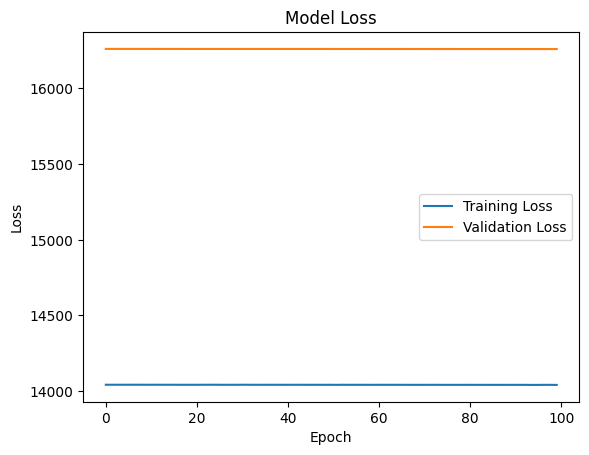

In [30]:
X = merged_data[features]
y = merged_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define input shape for the model based on the number of features
input_shape = (X_train.shape[1],)

# Use RobustScaler to handle outliers better
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a more complex neural network model
model = Sequential()
model.add(tf.keras.layers.Input(shape=input_shape))
model.add(Dense(128, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dense(1))

# Compile the model with a different optimizer and learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss="mean_absolute_error")

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Save the model and scaler
model.save("energy_prediction_model.keras")
with open("scaler.pkl", "wb") as f_out:
    pickle.dump(scaler, f_out)

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
# Compute the result

In [31]:
# Predict on the test set
y_pred_test = model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R^2 Score
r2 = r2_score(y_test, y_pred_test)
print(f"R^2 Score: {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Mean Absolute Error (MAE): 15831.783424468735
Mean Squared Error (MSE): 280394560.06770855
R^2 Score: -8.429610489855985
